✅ Data Loaded. Shape: (421570, 21)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Quarter,DayOfYear
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
1,1,2,2010-02-05,50605.27,0,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
2,1,3,2010-02-05,13740.12,0,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
3,1,4,2010-02-05,39954.04,0,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36
4,1,5,2010-02-05,32229.38,0,A,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,36


Holiday Samples: 29661
Non-Holiday Samples: 391909


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\920109717.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='coolwarm')


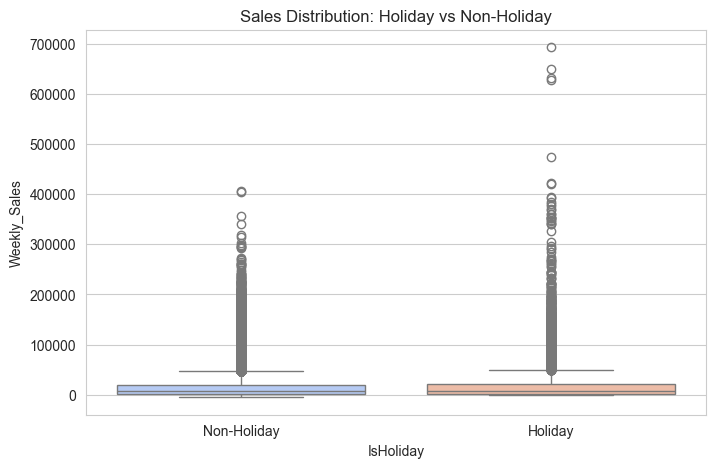

T-Statistic: 7.0007
P-Value: 2.5951e-12

✅ Conclusion: Reject the Null Hypothesis.
There IS a significant difference in sales during holidays.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\920109717.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Weekly_Sales', data=df, palette='viridis', order=['A', 'B', 'C'])


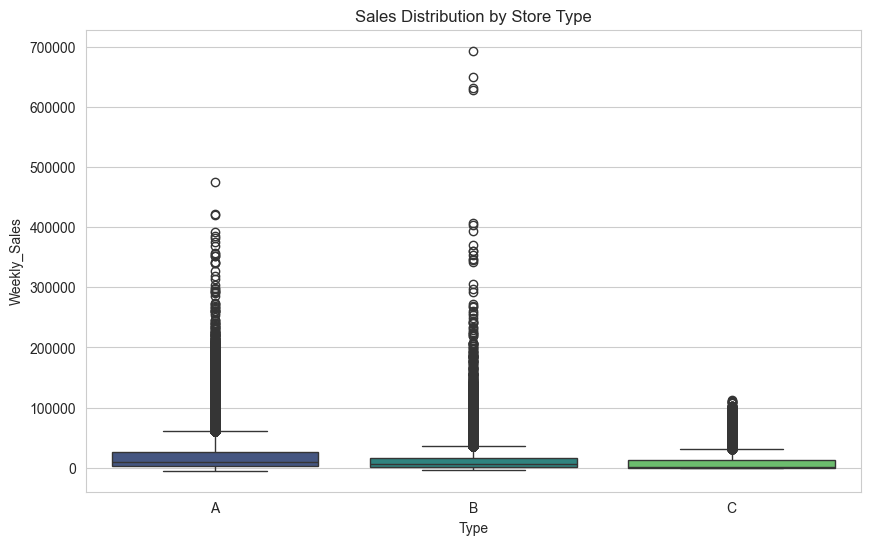

F-Statistic: 7764.4262
P-Value: 0.0000e+00

✅ Conclusion: Reject the Null Hypothesis.
Store Types have significantly different sales performance.
Markdown Weeks: 151432
No-Markdown Weeks: 270138


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11644\920109717.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has_Markdown', y='Weekly_Sales', data=df, palette='magma')


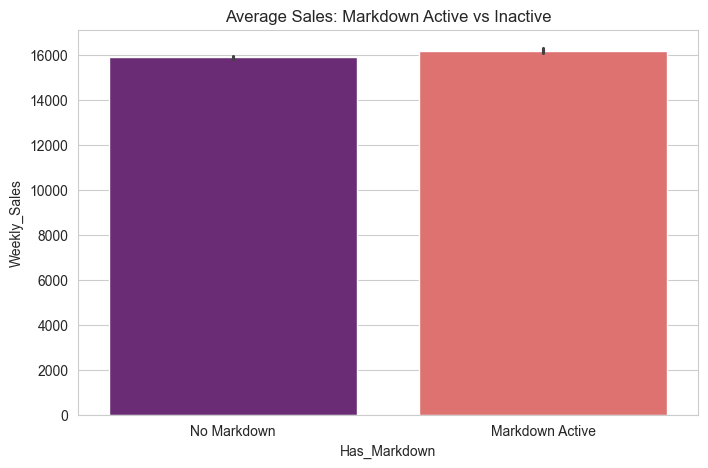

T-Statistic: 4.1479
P-Value: 3.3559e-05

✅ Conclusion: Reject the Null Hypothesis.
Markdowns have a significant impact on sales volume.


In [2]:
# %% [markdown]
# # 🧪 Step 2: Hypothesis Testing
# **Project:** Integrated Retail Analytics
#
# **Objective:**
# To validate business assumptions using statistical tests. We will define Null ($H_0$) and Alternate ($H_1$) hypotheses and use P-values to draw conclusions.
#
# **Key Questions:**
# 1. Do holidays have a significant impact on Weekly Sales?
# 2. Is there a significant difference in sales between different Store Types?
# 3. Do promotional Markdowns actually drive higher sales?

# %% [markdown]
# ## 1. Setup & Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set visual style
sns.set_style("whitegrid")

# Load Cleaned Data
data_path = "../data/processed/clean_retail_data.csv"

if not os.path.exists(data_path):
    print(f"❌ Error: File not found at {data_path}. Please run the Preprocessing notebook first.")
else:
    df = pd.read_csv(data_path)
    print(f"✅ Data Loaded. Shape: {df.shape}")
    display(df.head())

# %% [markdown]
# ## 2. Hypothesis 1: The Holiday Effect
# **Assumption:** Sales are higher during holidays (Thanksgiving, Christmas, Super Bowl).
#
# * **Null Hypothesis ($H_0$):** There is **NO** significant difference in average Weekly Sales between Holiday and Non-Holiday weeks. ($\mu_{holiday} = \mu_{non-holiday}$)
# * **Alternate Hypothesis ($H_1$):** There **IS** a significant difference in average Weekly Sales. ($\mu_{holiday} \neq \mu_{non-holiday}$)

# %%
# 1. Separate the groups
holiday_sales = df[df['IsHoliday'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['IsHoliday'] == 0]['Weekly_Sales']

print(f"Holiday Samples: {len(holiday_sales)}")
print(f"Non-Holiday Samples: {len(non_holiday_sales)}")

# 2. Visual Inspection
plt.figure(figsize=(8, 5))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df, palette='coolwarm')
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# 3. Statistical Test: T-Test (Independent)
# We use a T-test because we are comparing the means of two independent groups.
# Since sample size is large (>30), assumption of normality is less critical (Central Limit Theorem).
t_stat, p_val = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4e}")

# 4. Conclusion
alpha = 0.05
if p_val < alpha:
    print("\n✅ Conclusion: Reject the Null Hypothesis.")
    print("There IS a significant difference in sales during holidays.")
else:
    print("\n❌ Conclusion: Fail to reject the Null Hypothesis.")
    print("There is NO significant difference in sales during holidays.")

# %% [markdown]
# ## 3. Hypothesis 2: Impact of Store Type
# **Assumption:** Different store types (A, B, C) target different demographics and thus have different sales volumes.
#
# * **Null Hypothesis ($H_0$):** The average sales of Store Type A, B, and C are equal. ($\mu_A = \mu_B = \mu_C$)
# * **Alternate Hypothesis ($H_1$):** At least one Store Type has a different average sales volume.

# %%
# 1. Visual Inspection
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=df, palette='viridis', order=['A', 'B', 'C'])
plt.title('Sales Distribution by Store Type')
plt.show()

# 2. Prepare Data
group_a = df[df['Type'] == 'A']['Weekly_Sales']
group_b = df[df['Type'] == 'B']['Weekly_Sales']
group_c = df[df['Type'] == 'C']['Weekly_Sales']

# 3. Statistical Test: One-Way ANOVA
# We use ANOVA because we are comparing the means of MORE than 2 groups.
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val:.4e}")

# 4. Conclusion
if p_val < alpha:
    print("\n✅ Conclusion: Reject the Null Hypothesis.")
    print("Store Types have significantly different sales performance.")
else:
    print("\n❌ Conclusion: Fail to reject the Null Hypothesis.")
    print("Store Types perform similarly.")

# %% [markdown]
# ## 4. Hypothesis 3: Markdown Effectiveness
# **Assumption:** Aggressive promotional markdowns lead to higher sales volume.
#
# * **Null Hypothesis ($H_0$):** Sales during weeks with Markdowns are equal to sales without Markdowns.
# * **Alternate Hypothesis ($H_1$):** Sales during weeks with Markdowns are significantly different.

# %%
# 1. Create a "Has_Markdown" Feature
# We consider a week to have a markdown if ANY of the 5 Markdown categories > 0
df['Has_Markdown'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1) > 0
df['Has_Markdown'] = df['Has_Markdown'].astype(int)

# 2. Separate Groups
markdown_active = df[df['Has_Markdown'] == 1]['Weekly_Sales']
no_markdown = df[df['Has_Markdown'] == 0]['Weekly_Sales']

print(f"Markdown Weeks: {len(markdown_active)}")
print(f"No-Markdown Weeks: {len(no_markdown)}")

# 3. Visual Inspection
plt.figure(figsize=(8, 5))
sns.barplot(x='Has_Markdown', y='Weekly_Sales', data=df, palette='magma')
plt.title('Average Sales: Markdown Active vs Inactive')
plt.xticks([0, 1], ['No Markdown', 'Markdown Active'])
plt.show()

# 4. Statistical Test: T-Test
t_stat, p_val = stats.ttest_ind(markdown_active, no_markdown, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4e}")

# 5. Conclusion
if p_val < alpha:
    print("\n✅ Conclusion: Reject the Null Hypothesis.")
    print("Markdowns have a significant impact on sales volume.")
else:
    print("\n❌ Conclusion: Fail to reject the Null Hypothesis.")
    print("Markdowns do not appear to significantly change sales volume.")